# Overview

This notebook is processed on my local machine as kaggle only provides 20 GB for the output directory which is much less for this work as CLAHE implementation of 112k 1024x1024 images will solely consume 61 GB. 

I had done all the preprocessing and it actually took very long to do all this work so I have also uploaded the preprocessed dataset on kaggle itself so that you can directly use them.

I am linking all the datasets here, you can go to `Data Card` to get the overview:
- [NIH Chest X-rays](https://www.kaggle.com/datasets/nih-chest-xrays/data)
- [NIH CLAHE Enhanced Chest X-rays](https://www.kaggle.com/datasets/rahulogoel/clahe-enhancement-on-chestx-ray14)
- [NIH Balanced Chest X-rays](https://www.kaggle.com/datasets/rahulogoel/nih-balanced-chest-x-rays/data)
- [NIH Balanced & Resized Chest X-rays](https://www.kaggle.com/datasets/rahulogoel/nih-balanced-and-resized-chest-x-rays)

Lastly, below is the code for all the preprocessing done on the above datasets so you can go through it if you want and if you have any questions then feel free to ask me in the comments section.

# Code

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r"Dataset/Data_Entry_2017.csv")

In [ ]:
df.head(10)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
5,00000003_001.png,Hernia,1,3,74,F,PA,2500,2048,0.168,0.168,NaN
6,00000003_002.png,Hernia,2,3,75,F,PA,2048,2500,0.168,0.168,NaN
7,00000003_003.png,Hernia|Infiltration,3,3,76,F,PA,2698,2991,0.143,0.143,NaN
8,00000003_004.png,Hernia,4,3,77,F,PA,2500,2048,0.168,0.168,NaN
9,00000003_005.png,Hernia,5,3,78,F,PA,2686,2991,0.143,0.143,NaN


# One Hot Encoding

In [ ]:
labels = df["Finding Labels"].unique()
n_labels = [x.split('|') for x in list(df["Finding Labels"])]

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
y = multilabel_binarizer.fit_transform(n_labels)

extract_labels = list(multilabel_binarizer.classes_)
extract_labels

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'No Finding',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [ ]:
y

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
n_df = pd.DataFrame(y)
n_df = n_df.set_axis(extract_labels, axis = 1)
# n_df.drop("No Finding",axis=1 ,inplace= True)
n_df.insert(0,"Path", value=df["Image Index"])
n_df.head(10)

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,00000003_001.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,00000003_002.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,00000003_003.png,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
8,00000003_004.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,00000003_005.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
n_df.to_csv("labels.csv", index = False)

In [ ]:
# # ImageFilter for using filter() function 
# from PIL import Image, ImageFilter 
  
# # Opening the image  
# # (R prefixed to string in order to deal with '\' in paths) 
# image = Image.open(r"Dataset/00000001_000.png") 
  
# # Blurring image by sending the ImageFilter. 
# # GaussianBlur predefined kernel argument 
# image = image.filter(ImageFilter.GaussianBlur) 
  
# # Displaying the image 
# image.show()

# CLAHE

In [ ]:
# import the modules
import os
import cv2
from PIL import Image

# get the path/directory
folder_dir = "Dataset/images"
for images in os.listdir(folder_dir):
 
    # Reading the image from the present directory
    image = cv2.imread(f"Dataset/images/{images}")
    
    # The initial processing of the image
    image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # The declaration of CLAHE
    # clipLimit -> Threshold for contrast limiting
    # tileGridSize -> Number of tiles in the row and column
    clahe = cv2.createCLAHE(clipLimit=3, tileGridSize=(10, 10))
    final_img = clahe.apply(image_bw)

    # Adjust the brightness of the output
    final_img = cv2.add(final_img, 5)
    
    #Saving the image in seperate folder
    im = Image.fromarray(final_img) 
    image_path = "Dataset/IMAGE"
    im.save(f"{image_path}/{images}")
print("Task Completed")

Task Completed


# Data Preprocessing

In [ ]:
n_df = pd.read_csv("labels.csv", index_col=0)

In [ ]:
n_df

,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
Path,,,,,,,,,,,,,,,
00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
00000003_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00030801_001.png,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
00030802_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
00030803_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
def total_instances():
    
    total_data = []

    for i in extract_labels:
        total = n_df[i].value_counts()[1]
        total_data.append(total)

    return total_data

In [ ]:
total_data = total_instances()

In [ ]:
total_data

[11559,
 2776,
 4667,
 2303,
 13317,
 2516,
 1686,
 227,
 19894,
 5782,
 60361,
 6331,
 3385,
 1431,
 5302]

In [ ]:
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

Atelectasis = 11559 
Cardiomegaly = 2776 
Consolidation = 4667 
Edema = 2303 
Effusion = 13317 
Emphysema = 2516 
Fibrosis = 1686 
Hernia = 227 
Infiltration = 19894 
Mass = 5782 
No Finding = 60361 
Nodule = 6331 
Pleural_Thickening = 3385 
Pneumonia = 1431 
Pneumothorax = 5302 


In [ ]:
def show_plot():
    total_data = []
    for i in extract_labels:
        total = n_df[i].value_counts()[1]
        total_data.append(total)

    ax = pd.DataFrame({'li': extract_labels, 'total_data': total_data})
    fig = sns.barplot(x = "li", y = "total_data",data = ax)
    plt.xlabel("Classes")
    plt.ylabel("Counts")
    plt.title("Counts")
    plt.xticks(rotation = 90)
    plt.show(fig)

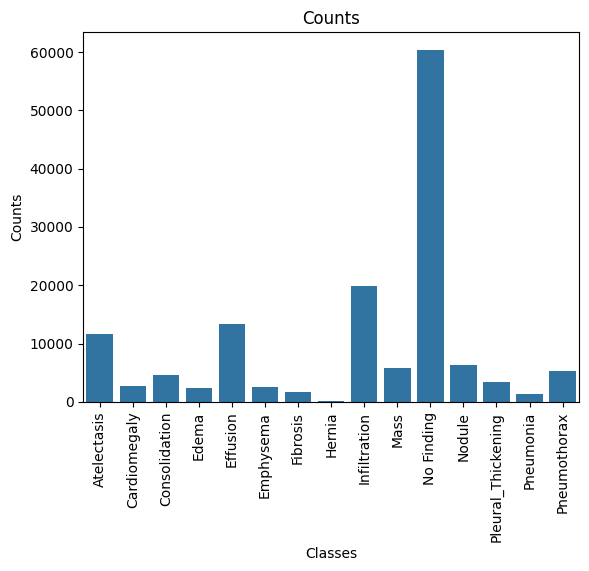

In [ ]:
show_plot()

As you can see in the above bar chart that the dataset is highly imbalanced as the `No Finding` class contains 60361 images which is about **53% of the whole dataset** whereas `Hernia` contains only 227 images. And this imbalanced dataset further result in a high biased model predictions and poor performance on minority classes. So it is very important to first balance the dataset with the help of techniques like **UnderSampling** & **Oversampling** to make it balance then proceed for training. 

# Undersampling

To balance the classes I will first randomly remove some rows of certain classes to achieve balance in the dataset.

No Finding

60,361 - 5,000 = 55361

In [ ]:
a = (n_df[n_df["No Finding"] == 1].sample(55361).index)
list(a)
len(a)

In [ ]:
for i in a:
    n_df.drop(index = i, inplace=True)

In [ ]:
n_df.shape, n_df["No Finding"].value_counts()

((56759, 16),
 No Finding
 0    51759
 1     5000
 Name: count, dtype: int64)

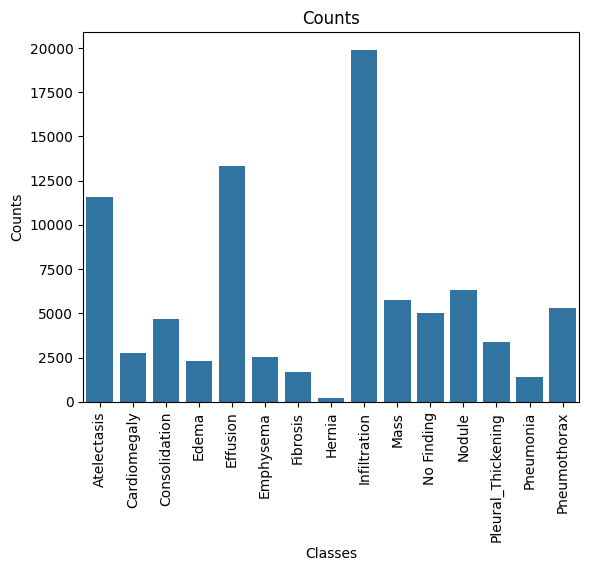

In [ ]:
show_plot()

So here the total rows for "No Finding" has dropped to 5000. Now, its time to balance next class.

Infiltration

In [ ]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

Atelectasis = 11559 
Cardiomegaly = 2776 
Consolidation = 4667 
Edema = 2303 
Effusion = 13317 
Emphysema = 2516 
Fibrosis = 1686 
Hernia = 227 
Infiltration = 19894 
Mass = 5782 
No Finding = 5000 
Nodule = 6331 
Pleural_Thickening = 3385 
Pneumonia = 1431 
Pneumothorax = 5302 


19894 - 5000 = 14894

In [ ]:
a = (n_df[n_df["Infiltration"] == 1].sample(14894).index)
print(list(a))

In [ ]:
for i in a:
    n_df.drop(index = i, inplace=True)

In [ ]:
n_df.shape, n_df["Infiltration"].value_counts()

((41865, 16),
 Infiltration
 0    36865
 1     5000
 Name: count, dtype: int64)

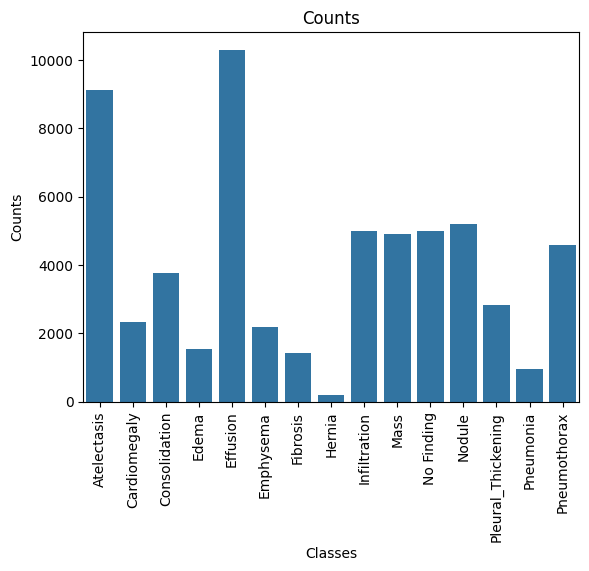

In [ ]:
show_plot()

Effusion

In [ ]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

Atelectasis = 9115 
Cardiomegaly = 2341 
Consolidation = 3768 
Edema = 1558 
Effusion = 10296 
Emphysema = 2175 
Fibrosis = 1431 
Hernia = 200 
Infiltration = 5000 
Mass = 4896 
No Finding = 5000 
Nodule = 5188 
Pleural_Thickening = 2830 
Pneumonia = 966 
Pneumothorax = 4579 


10296 - 5000 = 5296

In [ ]:
a = (n_df[n_df["Effusion"] == 1].sample(5296).index)
print(list(a))

In [ ]:
for i in a:
    n_df.drop(index = i, inplace=True)

In [ ]:
n_df.shape, n_df["Effusion"].value_counts()

((36569, 16),
 Effusion
 0    31569
 1     5000
 Name: count, dtype: int64)

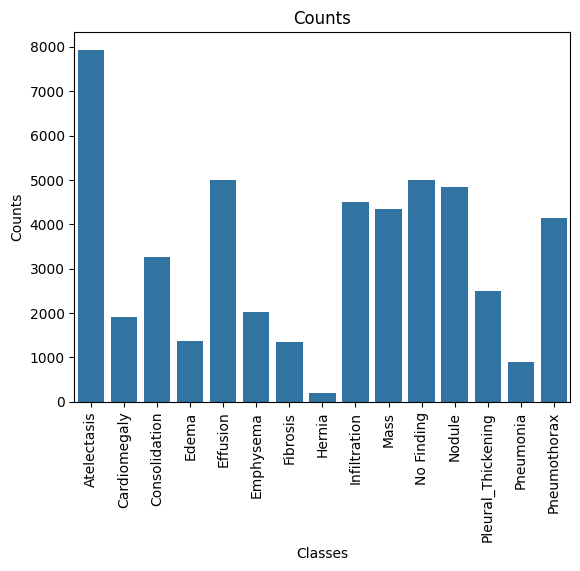

In [ ]:
show_plot()

Atelectasis

In [ ]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

Atelectasis = 7931 
Cardiomegaly = 1915 
Consolidation = 3269 
Edema = 1365 
Effusion = 5000 
Emphysema = 2025 
Fibrosis = 1357 
Hernia = 193 
Infiltration = 4496 
Mass = 4350 
No Finding = 5000 
Nodule = 4840 
Pleural_Thickening = 2498 
Pneumonia = 892 
Pneumothorax = 4146 


7931 - 5000 = 2931

In [ ]:
a = (n_df[n_df["Atelectasis"] == 1].sample(2931).index)
print(list(a))

In [ ]:
for i in a:
    n_df.drop(index = i, inplace=True)

In [ ]:
n_df.shape, n_df["Atelectasis"].value_counts()

((33638, 16),
 Atelectasis
 0    28638
 1     5000
 Name: count, dtype: int64)

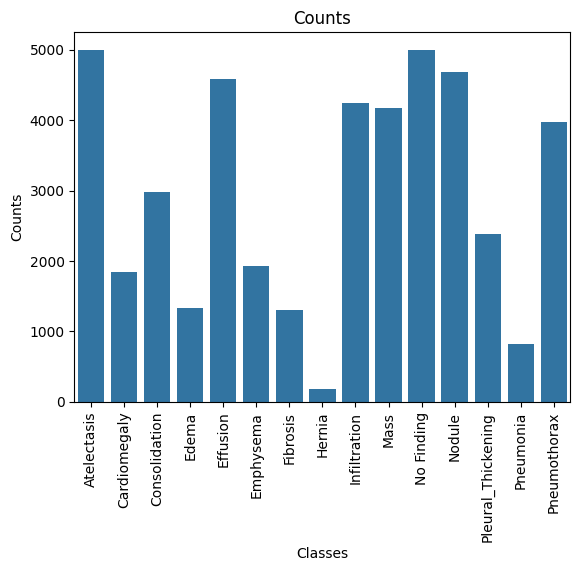

In [ ]:
show_plot()

In [ ]:
n_df.shape

(33638, 16)

In [ ]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

Atelectasis = 5000 
Cardiomegaly = 1845 
Consolidation = 2983 
Edema = 1332 
Effusion = 4588 
Emphysema = 1933 
Fibrosis = 1310 
Hernia = 182 
Infiltration = 4252 
Mass = 4181 
No Finding = 5000 
Nodule = 4689 
Pleural_Thickening = 2385 
Pneumonia = 827 
Pneumothorax = 3972 


Now the maximum instance of any class is not more than 5000 so undersampling is done and will proceed towards oversampling/data augmentation so that each class will contain around 5000 instances.

Before continuing further, we will delete the instance image form the image dataset. Currently there are 112120 images in the dataset and I will reduce it to 33638.

112120 - 33638 = 78482

In [ ]:
my_path = r"C:\Research\Dataset\new_images"

In [ ]:
from os import listdir
from os.path import isfile, join

In [ ]:
allfiles = [f for f in listdir(my_path) if isfile(join(my_path, f))]
len(allfiles)

45647

In [ ]:
to_be_kept = n_df['Path'].tolist()
to_be_deleted = [item for item in allfiles if item not in to_be_kept ]

In [ ]:
import os

In [ ]:
for file in to_be_deleted:
    os.remove(join(my_path, file))

In [ ]:
allfiles = [f for f in listdir(my_path) if isfile(join(my_path, f))]
len(allfiles)

42635

# Oversampling

First I will start from hernia as it has the lowest instances among any of the classes.

Hernia

5000 - 182 = 4818

In [ ]:
n_df.shape

(33638, 16)

In [ ]:
n_df.to_csv("tempfile.csv", index= False)

In [ ]:
t_df = n_df
t_df

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50048,591551301291.png,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
50049,481937983095.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
50050,507153605391.png,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
50051,848912473731.png,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
t_df = t_df.reset_index(drop = True)
t_df

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33633,00030793_000.png,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
33634,00030794_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
33635,00030795_000.png,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
33636,00030801_001.png,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
import albumentations as A

c:\Users\RAHUL\AppData\Local\Programs\Python\Python312\Lib\site-packages\albumentations\__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.17 (you have 1.4.16). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [ ]:
import cv2

In [ ]:
index_no = (t_df[t_df["Hernia"] == 1].sample(182).index)
index_no


In [ ]:
from tqdm import tqdm

In [ ]:
index_list = []

In [ ]:
for i in tqdm(index_no):
    path = 'C:/Research/Dataset/new_images/' + t_df['Path'][i][:12] +".png"
    img = image.load_img(path, target_size=(1024, 1024, 3))
    img = image.img_to_array(img)
    img = img/255.0
    index_list.append(img)

100%|██████████| 182/182 [00:07<00:00, 24.61it/s]


In [ ]:
len(index_list)

182

In [ ]:
index_list = np.array(index_list)
index_list.shape

(182, 1024, 1024, 3)

In [ ]:
transform = A.Compose([
    A.HorizontalFlip(),
    A.RandomRotate90() , 
    A.Sharpen(p = 1),
    A.VerticalFlip(),
])

images needed = (5000 - 182 ==> 4818)

now, we have total 182 images so,

4818 / 182 ==> 26.47

This means we need to iterate around 26 times on the same image for data aumentation.

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
import random
def random_name():
        digits =  12
        return random.randrange(111111111111, 999999999999, digits)

In [ ]:
index_no[0]

10544

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
t_df.to_csv("new_labels.csv")

In [ ]:
for i in tqdm(range(0, len(index_no))):
    for j in range(26):
        transformed_image = transform(image = index_list[i])["image"]
        image_path = r"C:\Research\Dataset\new_images"
        image_name = str(random_name())
        plt.imsave(image_path + f"\\{image_name}.png", arr=transformed_image)

        t_df = t_df._append(t_df.iloc[index_no[i]])
        t_df = t_df.reset_index(drop = True)
        t_df["Path"].iloc[-1] = f"{image_name}.png"


100%|██████████| 182/182 [33:15<00:00, 10.97s/it]


In [ ]:
t_df.tail()

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
38365,623268567627.png,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
38366,366454177551.png,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
38367,513741763371.png,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
38368,819767069355.png,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
38369,819056468595.png,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
t_df.to_csv("del.csv")

In [ ]:
t_df.shape

(38370, 16)

In [ ]:
n_df = t_df
n_df.shape

(38370, 16)

In [ ]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

Atelectasis = 5624 
Cardiomegaly = 2001 
Consolidation = 3061 
Edema = 1358 
Effusion = 4822 
Emphysema = 2011 
Fibrosis = 1466 
Hernia = 4914 
Infiltration = 4382 
Mass = 4675 
No Finding = 5000 
Nodule = 4845 
Pleural_Thickening = 2489 
Pneumonia = 853 
Pneumothorax = 4102 


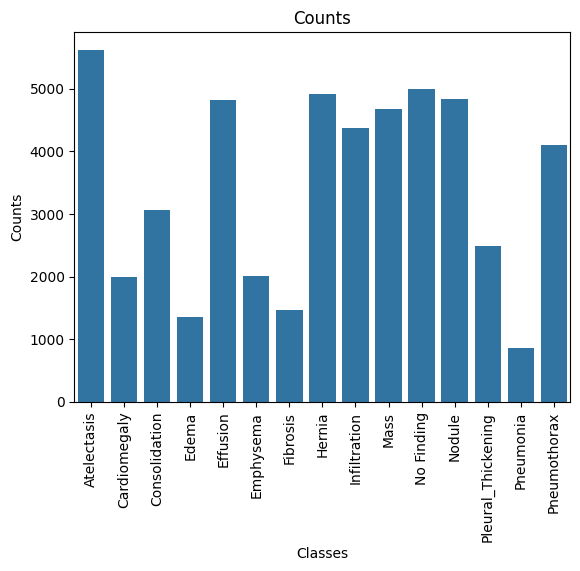

In [ ]:
show_plot()

Now, next class will be Pneumonia

In [ ]:
index_no = (t_df[t_df["Pneumonia"] == 1].sample(853).index)
index_no

In [ ]:
index_list = []

In [ ]:
for i in tqdm(index_no):
    path = 'C:/Research/Dataset/new_images/' + t_df['Path'][i][:12] +".png"
    img = image.load_img(path, target_size=(1024, 1024, 3))
    img = image.img_to_array(img)
    img = img/255.0
    index_list.append(img)

100%|██████████| 853/853 [00:43<00:00, 19.76it/s]


In [ ]:
len(index_list)

853

In [ ]:
index_list = np.array(index_list)
index_list.shape

(853, 1024, 1024, 3)

images needed = (5000 - 853 ==> 4147)

4147 / 853 ==> 4.86

now, we will iterate 5 times per image

In [ ]:
index_no[0]

6070

In [ ]:
t_df.to_csv("new_labels.csv")

In [ ]:
len(index_no)

853

In [ ]:
for i in tqdm(range(0, len(index_no))):
    for j in range(5):
        transformed_image = transform(image = index_list[i])["image"]
        image_path = r"C:\Research\Dataset\new_images"
        image_name = str(random_name())
        plt.imsave(image_path + f"\\{image_name}.png", arr=transformed_image)

        t_df = t_df._append(t_df.iloc[index_no[i]])
        t_df = t_df.reset_index(drop = True)
        t_df["Path"].iloc[-1] = f"{image_name}.png"

100%|██████████| 853/853 [40:41<00:00,  2.86s/it]


In [ ]:
t_df.to_csv("del.csv")
t_df.shape

(42635, 16)

In [ ]:
n_df = t_df
n_df.shape

(42635, 16)

In [ ]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

Atelectasis = 6214 
Cardiomegaly = 2101 
Consolidation = 3446 
Edema = 2133 
Effusion = 5412 
Emphysema = 2091 
Fibrosis = 1506 
Hernia = 5049 
Infiltration = 4967 
Mass = 4855 
No Finding = 5000 
Nodule = 5065 
Pleural_Thickening = 2579 
Pneumonia = 5118 
Pneumothorax = 4222 


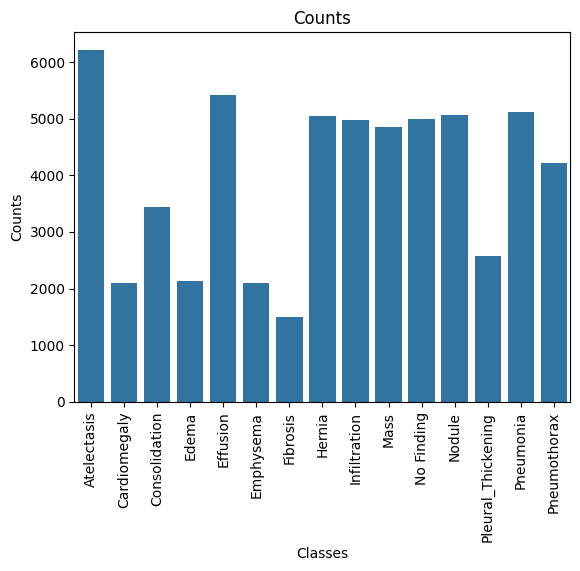

In [ ]:
show_plot()

Fibrosis

In [ ]:
index_no = (t_df[t_df["Fibrosis"] == 1].sample(1506).index)
index_no

In [ ]:
index_list = []

In [ ]:
for i in tqdm(index_no):
    path = 'C:/Research/Dataset/new_images/' + t_df['Path'][i][:12] +".png"
    img = image.load_img(path, target_size=(1024, 1024, 3))
    img = image.img_to_array(img)
    img = img/255.0
    index_list.append(img)

100%|██████████| 1506/1506 [01:06<00:00, 22.49it/s]


In [ ]:
len(index_list)

1506

In [ ]:
index_list = np.array(index_list)
index_list.shape

(1506, 1024, 1024, 3)

images needed = (5000 - 1506 ==> 3494)

3494 / 1506 ==> 2.32

now this time, we have to iterate over 2 times per image

In [ ]:
index_no[0]

106

In [ ]:
t_df.to_csv("new_labels.csv")

In [ ]:
len(index_no)

1506

In [ ]:
for i in tqdm(range(0, len(index_no))):
    for j in range(2):
        transformed_image = transform(image = index_list[i])["image"]
        image_path = r"C:\Research\Dataset\new_images"
        image_name = str(random_name())
        plt.imsave(image_path + f"\\{image_name}.png", arr=transformed_image)

        t_df = t_df._append(t_df.iloc[index_no[i]])
        t_df = t_df.reset_index(drop = True)
        t_df["Path"].iloc[-1] = f"{image_name}.png"

100%|██████████| 1506/1506 [26:42<00:00,  1.06s/it]


In [ ]:
t_df.to_csv("del.csv")
t_df.shape

(45647, 16)

In [ ]:
t_df.tail()

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
45642,920790648651.png,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
45643,254452145511.png,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
45644,692817036231.png,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
45645,577061531019.png,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
45646,803599759011.png,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0


In [ ]:
index_no[-1]

3915

In [ ]:
n_df = t_df
n_df.shape

(45647, 16)

In [ ]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

Atelectasis = 6504 
Cardiomegaly = 2219 
Consolidation = 3574 
Edema = 2191 
Effusion = 5616 
Emphysema = 2191 
Fibrosis = 4518 
Hernia = 5373 
Infiltration = 5151 
Mass = 5117 
No Finding = 5000 
Nodule = 5337 
Pleural_Thickening = 2847 
Pneumonia = 5214 
Pneumothorax = 4334 


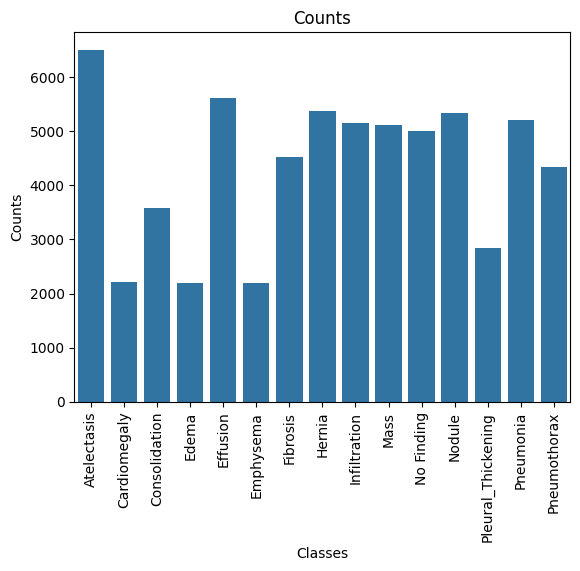

In [ ]:
show_plot()

Edema

In [ ]:
index_no = (t_df[t_df["Edema"] == 1].sample(2191).index)
index_no

In [ ]:
index_list = []

In [ ]:
for i in tqdm(index_no):
    path = 'C:/Research/Dataset/new_images/' + t_df['Path'][i][:12] +".png"
    img = image.load_img(path, target_size=(1024, 1024, 3))
    img = image.img_to_array(img)
    img = img/255.0
    index_list.append(img)

100%|██████████| 2191/2191 [01:43<00:00, 21.23it/s]


In [ ]:
len(index_list)

2191

In [ ]:
index_list = np.array(index_list)
index_list.shape

(2191, 1024, 1024, 3)

images needed = (5000 - 2191 ==> 2809)

2809 / 2191 ==> 1.28

now this time, we only have to iterate over 1 time per image

In [ ]:
index_no[0]

38704

In [ ]:
t_df.to_csv("new_labels.csv")

In [ ]:
len(index_no)

2191

In [ ]:
for i in tqdm(range(0, len(index_no))):
    for j in range(1):
        transformed_image = transform(image = index_list[i])["image"]
        image_path = r"C:\Research\Dataset\new_images"
        image_name = str(random_name())
        plt.imsave(image_path + f"\\{image_name}.png", arr=transformed_image)

        t_df = t_df._append(t_df.iloc[index_no[i]])
        t_df = t_df.reset_index(drop = True)
        t_df["Path"].iloc[-1] = f"{image_name}.png"

100%|██████████| 2191/2191 [19:42<00:00,  1.85it/s]


In [ ]:
t_df.to_csv("del.csv")
t_df.shape

(47838, 16)

In [ ]:
t_df.tail()

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
47833,164161340235.png,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
47834,879690447027.png,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
47835,856772788395.png,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
47836,378164516379.png,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
47837,266471345679.png,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
index_no[-1]

14197

In [ ]:
n_df = t_df
n_df.shape

(47838, 16)

In [ ]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

Atelectasis = 6620 
Cardiomegaly = 2366 
Consolidation = 3675 
Edema = 4382 
Effusion = 5954 
Emphysema = 2215 
Fibrosis = 4605 
Hernia = 5454 
Infiltration = 5606 
Mass = 5201 
No Finding = 5000 
Nodule = 5429 
Pleural_Thickening = 2899 
Pneumonia = 6144 
Pneumothorax = 4373 


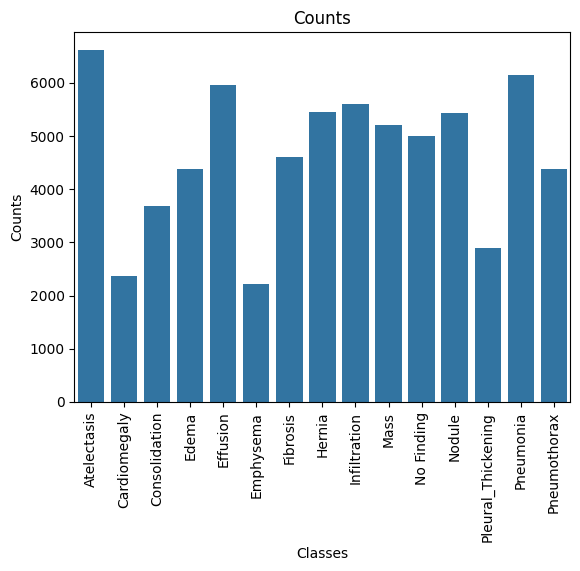

In [ ]:
show_plot()

Emphysema

In [ ]:
index_no = (t_df[t_df["Emphysema"] == 1].sample(2215).index)
index_no

Index([14675,  6278, 41368, 30363,  2655, 33071, 37466, 27442, 13647, 38533,
       ...
       32978, 14453, 26323, 22733,  6289, 23494, 19689, 12713, 29592, 29409],
      dtype='int64', length=2215)

In [ ]:
index_list = []

In [ ]:
for i in tqdm(index_no):
    path = 'C:/Research/Dataset/new_images/' + t_df['Path'][i][:12] +".png"
    img = image.load_img(path, target_size=(1024, 1024, 3))
    img = image.img_to_array(img)
    img = img/255.0
    index_list.append(img)

100%|██████████| 2215/2215 [02:07<00:00, 17.40it/s]


In [ ]:
len(index_list)

2215

In [ ]:
index_list = np.array(index_list)
index_list.shape

(2215, 1024, 1024, 3)

images needed = (5000 - 2215 ==> 2785)

2785 / 2215 ==> 1.25

we will iterate only once per image in this case

In [ ]:
index_no[0]

14675

In [ ]:
t_df.to_csv("new_labels.csv")

In [ ]:
len(index_no)

2215

In [ ]:
for i in tqdm(range(0, len(index_no))):
    transformed_image = transform(image = index_list[i])["image"]
    image_path = r"C:\Research\Dataset\new_images"
    image_name = str(random_name())
    plt.imsave(image_path + f"\\{image_name}.png", arr=transformed_image)

    t_df = t_df._append(t_df.iloc[index_no[i]])
    t_df = t_df.reset_index(drop = True)
    t_df["Path"].iloc[-1] = f"{image_name}.png"

100%|██████████| 2215/2215 [24:29<00:00,  1.51it/s]


In [ ]:
t_df.to_csv("del.csv")
t_df.shape

(50053, 16)

In [ ]:
t_df.tail()

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
50048,591551301291.png,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
50049,481937983095.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
50050,507153605391.png,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
50051,848912473731.png,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
50052,204360637995.png,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
index_no[-1]

In [ ]:
n_df = t_df
n_df.shape

(50053, 16)

In [ ]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

Atelectasis = 6859 
Cardiomegaly = 2399 
Consolidation = 3742 
Edema = 4430 
Effusion = 6090 
Emphysema = 4430 
Fibrosis = 4755 
Hernia = 5589 
Infiltration = 5736 
Mass = 5450 
No Finding = 5000 
Nodule = 5515 
Pleural_Thickening = 3036 
Pneumonia = 6246 
Pneumothorax = 4962 


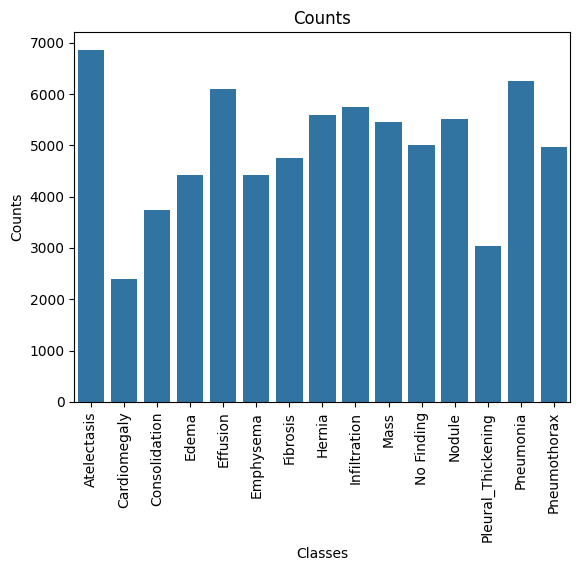

In [ ]:
show_plot()

Cardiomegaly

Although we have 2399 iamges for cardiomegaly, we will only use 1300 images for data augmentation

In [ ]:
index_no = (t_df[t_df["Cardiomegaly"] == 1].sample(1300).index)
index_no

In [ ]:
index_list = []

In [ ]:
for i in tqdm(index_no):
    path = 'C:/Research/Dataset/new_images/' + t_df['Path'][i][:12] +".png"
    img = image.load_img(path, target_size=(1024, 1024, 3))
    img = image.img_to_array(img)
    img = img/255.0
    index_list.append(img)

100%|██████████| 1300/1300 [00:52<00:00, 24.69it/s]


In [ ]:
len(index_list)

1300

In [ ]:
index_list = np.array(index_list)
index_list.shape

(1300, 1024, 1024, 3)

images needed = (5000 - 2399 ===> 2601)

2601 / 2399 ==> 2.0007

now, we will iterate twice per image.

In [ ]:
index_no[0]

1586

In [ ]:
t_df.to_csv("new_labels.csv")

In [ ]:
len(index_no)

1300

We will decrease the sharpen in transform data augmentation from 1 to 0.5 as in previous augmentations all the images are sharpen but when we further transform other classes then it can take the sample images again for augmentation as it is multi-label data so inspite of sharpening the image once, it will sharpen it 2 or in some cases 3 times also which will degrade image quality.

In [ ]:
transform = A.Compose([
    A.HorizontalFlip(),
    A.RandomRotate90() , 
    A.Sharpen(p = 0.5),
    A.VerticalFlip(),
])

In [ ]:
for i in tqdm(range(0, len(index_no))):
    for j in range(2):
        transformed_image = transform(image = index_list[i])["image"]
        image_path = r"C:\Research\Dataset\new_images"
        image_name = str(random_name())
        plt.imsave(image_path + f"\\{image_name}.png", arr=transformed_image)

        t_df = t_df._append(t_df.iloc[index_no[i]])
        t_df = t_df.reset_index(drop = True)
        t_df["Path"].iloc[-1] = f"{image_name}.png"

100%|██████████| 1300/1300 [24:44<00:00,  1.14s/it]


In [ ]:
t_df.to_csv("del.csv")
t_df.shape

(52653, 16)

In [ ]:
t_df.tail()

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
52648,335587425831.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
52649,803898964491.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
52650,294088792419.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
52651,429064508943.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
52652,986708827383.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
index_no[-1]

12649

In [ ]:
n_df = t_df
n_df.shape

(52653, 16)

In [ ]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

Atelectasis = 7045 
Cardiomegaly = 4999 
Consolidation = 3858 
Edema = 4736 
Effusion = 6808 
Emphysema = 4480 
Fibrosis = 5013 
Hernia = 5889 
Infiltration = 5898 
Mass = 5554 
No Finding = 5000 
Nodule = 5577 
Pleural_Thickening = 3090 
Pneumonia = 6384 
Pneumothorax = 5004 


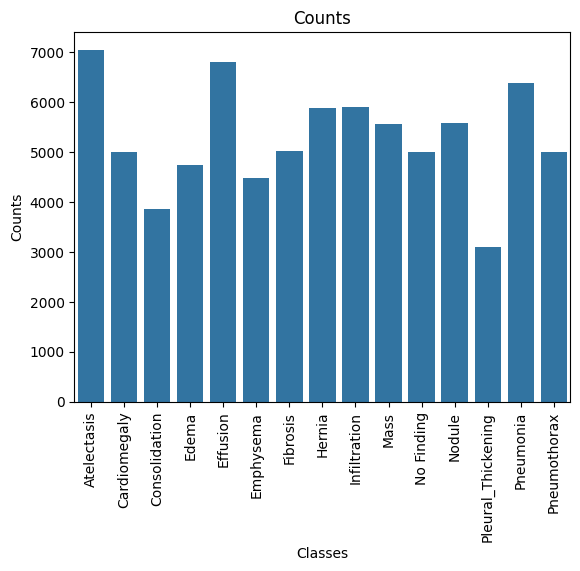

In [ ]:
show_plot()

Pleural_Thickening

in this case also, we have 3090 images of Pleural_Thickening but we will use only 1000 images for data augmentation.

In [ ]:
index_no = (t_df[t_df["Pleural_Thickening"] == 1].sample(1000).index)
index_no

In [ ]:
index_list = []

In [ ]:
for i in tqdm(index_no):
    path = 'C:/Research/Dataset/new_images/' + t_df['Path'][i][:12] +".png"
    img = image.load_img(path, target_size=(1024, 1024, 3))
    img = image.img_to_array(img)
    img = img/255.0
    index_list.append(img)

100%|██████████| 1000/1000 [00:53<00:00, 18.85it/s]


In [ ]:
len(index_list)

1000

In [ ]:
index_list = np.array(index_list)
index_list.shape

(1000, 1024, 1024, 3)

images needed = (5000 - 3090 ==> 1910)

1901 / 1000 ==> 1.91

now again, we will iterate twice per image.

In [ ]:
index_no[0]

In [ ]:
t_df.to_csv("new_labels.csv")

In [ ]:
len(index_no)

As we have more sharpen images so will reduce the probablity of sharpen by 10%.

In [ ]:
transform = A.Compose([
    A.HorizontalFlip(),
    A.RandomRotate90() , 
    A.Sharpen(p = 0.4),
    A.VerticalFlip(),
])

In [ ]:
for i in tqdm(range(0, len(index_no))):
    for j in range(2):
        transformed_image = transform(image = index_list[i])["image"]
        image_path = r"C:\Research\Dataset\new_images"
        image_name = str(random_name())
        plt.imsave(image_path + f"\\{image_name}.png", arr=transformed_image)

        t_df = t_df._append(t_df.iloc[index_no[i]])
        t_df = t_df.reset_index(drop = True)
        t_df["Path"].iloc[-1] = f"{image_name}.png"

100%|██████████| 1000/1000 [19:35<00:00,  1.18s/it]


In [ ]:
t_df.to_csv("del.csv")
t_df.shape

(54653, 16)

In [ ]:
t_df.tail()

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
54648,452445798819.png,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
54649,158495932515.png,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
54650,628157231283.png,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
54651,848993354295.png,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
54652,777442188207.png,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
index_no[-1]

445

In [ ]:
n_df = t_df
n_df.shape

(54653, 16)

In [ ]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

Atelectasis = 7221 
Cardiomegaly = 5077 
Consolidation = 3962 
Edema = 4818 
Effusion = 7076 
Emphysema = 4680 
Fibrosis = 5291 
Hernia = 6003 
Infiltration = 6034 
Mass = 5772 
No Finding = 5000 
Nodule = 5801 
Pleural_Thickening = 5090 
Pneumonia = 6470 
Pneumothorax = 5192 


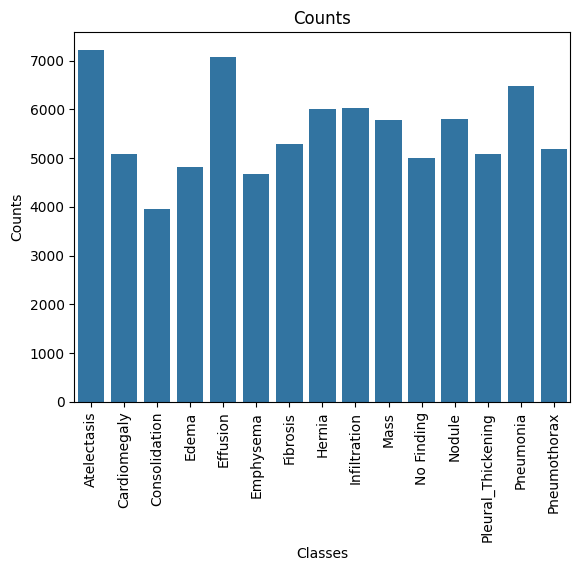

In [ ]:
show_plot()

Consolidation

in this case,  we will use only 500 images for data aug.

In [ ]:
index_no = (t_df[t_df["Consolidation"] == 1].sample(500).index)
index_no

In [ ]:
index_list = []

In [ ]:
for i in tqdm(index_no):
    path = 'C:/Research/Dataset/new_images/' + t_df['Path'][i][:12] +".png"
    img = image.load_img(path, target_size=(1024, 1024, 3))
    img = image.img_to_array(img)
    img = img/255.0
    index_list.append(img)

100%|██████████| 500/500 [00:25<00:00, 19.89it/s]


In [ ]:
len(index_list)

500

In [ ]:
index_list = np.array(index_list)
index_list.shape

(500, 1024, 1024, 3)

images needed = (5000 - 3962 ==> 1038)

1038 / 500 = 2.07

we will again iterate twice per 500 images.


In [ ]:
index_no[0]

1541

In [ ]:
t_df.to_csv("new_labels.csv")

In [ ]:
len(index_no)

500

decreasing sharpen image probab by another 10%

In [ ]:
transform = A.Compose([
    A.HorizontalFlip(),
    A.RandomRotate90() , 
    A.Sharpen(p = 0.3),
    A.VerticalFlip(),
])

In [ ]:
for i in tqdm(range(0, len(index_no))):
    for j in range(2):
        transformed_image = transform(image = index_list[i])["image"]
        image_path = r"C:\Research\Dataset\new_images"
        image_name = str(random_name())
        plt.imsave(image_path + f"\\{image_name}.png", arr=transformed_image)

        t_df = t_df._append(t_df.iloc[index_no[i]])
        t_df = t_df.reset_index(drop = True)
        t_df["Path"].iloc[-1] = f"{image_name}.png"

100%|██████████| 500/500 [06:38<00:00,  1.26it/s]


In [ ]:
t_df.to_csv("del.csv")
t_df.shape

(55653, 16)

In [ ]:
t_df.tail()

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
55648,134024281743.png,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
55649,518123056287.png,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
55650,731536933107.png,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
55651,374302078287.png,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0
55652,845173743735.png,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
index_no[-1]

2941

In [ ]:
n_df = t_df
n_df.shape

(55653, 16)

In [ ]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

Atelectasis = 7401 
Cardiomegaly = 5127 
Consolidation = 4962 
Edema = 4888 
Effusion = 7226 
Emphysema = 4712 
Fibrosis = 5341 
Hernia = 6023 
Infiltration = 6110 
Mass = 5874 
No Finding = 5000 
Nodule = 5863 
Pleural_Thickening = 5158 
Pneumonia = 6618 
Pneumothorax = 5238 


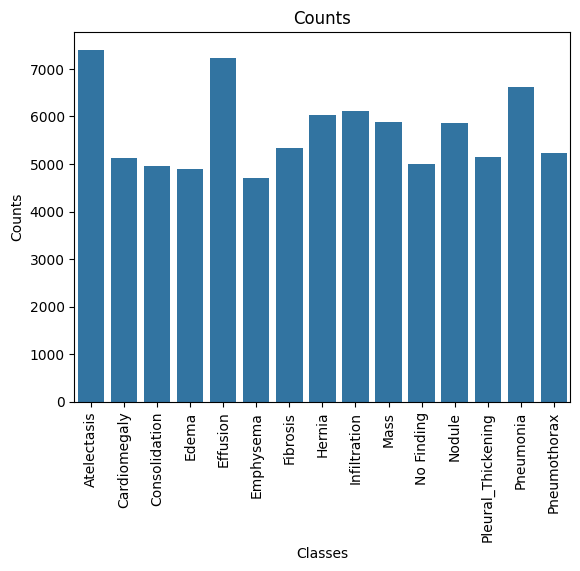

In [ ]:
show_plot()

In [ ]:
t_df.to_csv("new_labels.csv")

Now, almost all of our classes are balanced with images of around 5000 but still 2 classes that is Atelectasis and Effusion and containing images over 7000 so we will have to undersample these 2 classes.

In [ ]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

Atelectasis = 7401 
Cardiomegaly = 5127 
Consolidation = 4962 
Edema = 4888 
Effusion = 7226 
Emphysema = 4712 
Fibrosis = 5341 
Hernia = 6023 
Infiltration = 6110 
Mass = 5874 
No Finding = 5000 
Nodule = 5863 
Pleural_Thickening = 5158 
Pneumonia = 6618 
Pneumothorax = 5238 


7401 - 5000 = 2401

In [ ]:
a = (n_df[n_df["Atelectasis"] == 1].sample(2401).index)
print(list(a))

In [ ]:
for i in a:
    n_df.drop(index = i, inplace=True)

NOTE: The images are only dropped from dataframe not from out folder so that we will do it later at once.

In [ ]:
n_df.shape, n_df["Atelectasis"].value_counts()

((53252, 16),
 Atelectasis
 0    48252
 1     5000
 Name: count, dtype: int64)

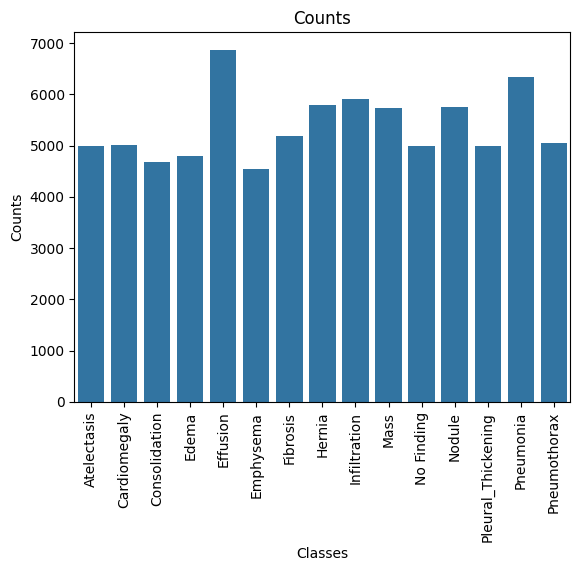

In [ ]:
show_plot()

In [ ]:
n_df.shape

(53252, 16)

Effusion

In [ ]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

Atelectasis = 5000 
Cardiomegaly = 5008 
Consolidation = 4681 
Edema = 4799 
Effusion = 6870 
Emphysema = 4551 
Fibrosis = 5187 
Hernia = 5796 
Infiltration = 5901 
Mass = 5727 
No Finding = 5000 
Nodule = 5751 
Pleural_Thickening = 5001 
Pneumonia = 6340 
Pneumothorax = 5044 


6870 - 5000 = 1870

In [ ]:
a = (n_df[n_df["Effusion"] == 1].sample(1870).index)
print(list(a))

In [ ]:
for i in a:
    n_df.drop(index = i, inplace=True)

In [ ]:
n_df.shape, n_df["Effusion"].value_counts()

((51382, 16),
 Effusion
 0    46382
 1     5000
 Name: count, dtype: int64)

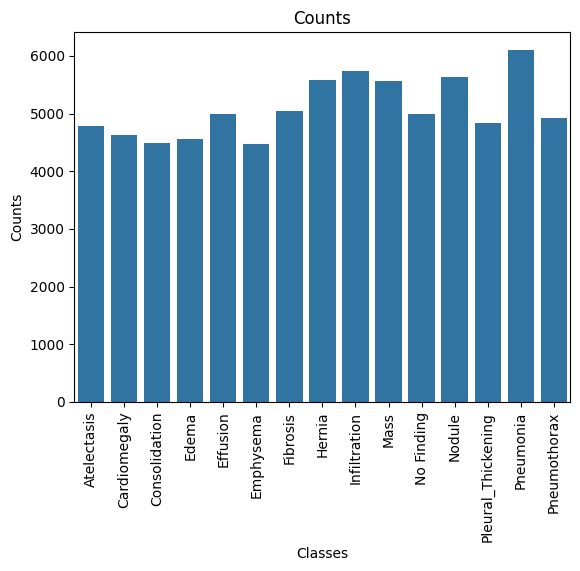

In [ ]:
show_plot()

In [ ]:
total_data = total_instances()
for i in range(len(total_data)):
    print(f"{extract_labels[i]} = {total_data[i]} ")

Atelectasis = 4788 
Cardiomegaly = 4629 
Consolidation = 4481 
Edema = 4554 
Effusion = 5000 
Emphysema = 4467 
Fibrosis = 5039 
Hernia = 5590 
Infiltration = 5740 
Mass = 5564 
No Finding = 5000 
Nodule = 5634 
Pleural_Thickening = 4831 
Pneumonia = 6105 
Pneumothorax = 4919 


In [ ]:
n_df.shape

(51382, 16)

Now, finally we gonna drop the images from our dataset folder also which we earlier drop from our dataframe.

In [ ]:
my_path = r"C:\Research\Dataset\new_images"
allfiles = [f for f in listdir(my_path) if isfile(join(my_path, f))]
len(allfiles)

55653

In [ ]:
to_be_kept = n_df['Path'].tolist()
to_be_deleted = [item for item in allfiles if item not in to_be_kept ]

In [ ]:
for file in to_be_deleted:
    os.remove(join(my_path, file))

In [ ]:
allfiles = [f for f in listdir(my_path) if isfile(join(my_path, f))]
len(allfiles)

51382

In [ ]:
n_df.shape

(51382, 16)

Here we can see that our dataframe and image folder contain same number of images.

So, now our previously highly imbalanced dataset is now balanced and further it is ready for training :)

In [ ]:
n_df = pd.read_csv("new_labels.csv", index_col=0)

In [ ]:
n_df = pd.read_csv("new_labels.csv")

In [ ]:
n_df

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51377,259702044147.png,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
51378,134024281743.png,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
51379,518123056287.png,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
51380,731536933107.png,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
n_df.shape

(51382, 16)

In [ ]:
n_df["Path"].nunique()

51382

In [ ]:
n_df

,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,00000001_002.png,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,00000003_000.png,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55647,259702044147.png,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
55648,134024281743.png,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
55649,518123056287.png,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
55650,731536933107.png,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


# Dataset ready!!

In [ ]:
n_df.to_csv("new_labels.csv", index=False)